# Bottleneck Simulated Annealing

In [1]:
import numpy as np
import scipy.spatial
import seaborn as sns

## Generate some data

In [280]:
NUM_POINTS = 1000
NUM_FEATURES = 12

### Generate points

In [281]:
points = np.random.rand(NUM_POINTS, NUM_FEATURES)

### Compute pairwise distances

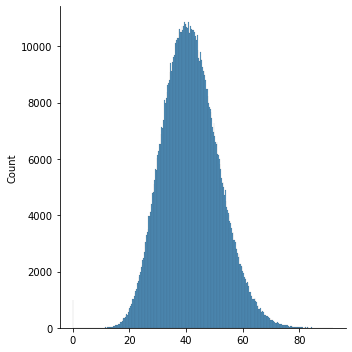

In [282]:
NORM_P = 6/NUM_FEATURES
distance_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(points, "minkowski", p=NORM_P))
sns.displot(distance_matrix.flatten())

## Compute the best path through the points

### Define the objective

In [283]:
from simanneal import Annealer

rng = np.random.default_rng()

class BottleneckAnnealer(Annealer):
    copy_strategy = "method"  # Use `self.state.copy()` to copy the state
    
    # Override default hyperparameters
    Tmin = 1e-6
    Tmax = 1e3
    steps = 100000

    def __init__(self, *args, path: np.ndarray, distance_matrix: np.ndarray, **kwargs):
        super().__init__(path, *args, **kwargs)
        self.distance_matrix = distance_matrix
        self.num_points = len(self.state)

    def move(self):
        """
        Randomly swap points
        """
        num_swaps = int(np.random.rand() * 4)
        swaps = rng.choice(self.num_points, (num_swaps, 2), replace=False)
        self.state[swaps] = self.state[swaps[..., ::-1]]

    def energy(self):
        """
        Compute the energy of the current path
        """
        # Find the length of the edge from each node in the path to the next
        source_nodes = self.state
        target_nodes = np.roll(source_nodes, 1)
        edge_distances = self.distance_matrix[source_nodes, target_nodes]
        max_edge_length = edge_distances.max()
        mean_edge_length = edge_distances.mean()
        energy = max_edge_length + mean_edge_length
        return energy

### Initialize the annealer

In [284]:
annealer = BottleneckAnnealer(path=np.arange(len(points)), distance_matrix=distance_matrix)
print(f"Start energy: {annealer.energy()}")

Start energy: 114.14506925482164


### Optimize

In [ ]:
best_path, best_energy = annealer.anneal()
print(f"Best energy: {best_energy}")
print(best_path)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
   288.40315        117.37   100.00%    37.40%     0:00:00     0:00:07